# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 7.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv') ## Fill the blank to read the data

In [6]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
df.shape

(1898, 9)

#### Observations:
That's a lot of data points

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
This should be enough fields to get meaningful data

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
No null data points to massage

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
- Min time: 20 minutes
- Max time: 35 minutes
- Avg time: ~27 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [16]:
df['order_id'].nunique()

1898

In [17]:
df['customer_id'].nunique()

1200

In [18]:
df['restaurant_name'].nunique()

178

In [19]:
df['cuisine_type'].nunique()

14

### Type of Cuisine

<Axes: xlabel='cuisine_type', ylabel='count'>

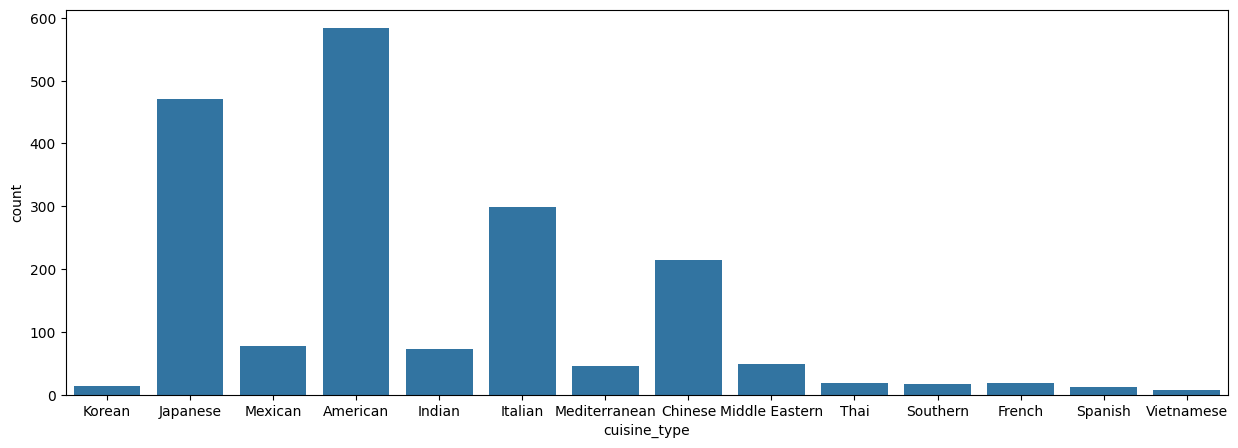

In [20]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

#### Observations:
It seems like people favor American and Japanese cuisine

### Cost of Orders

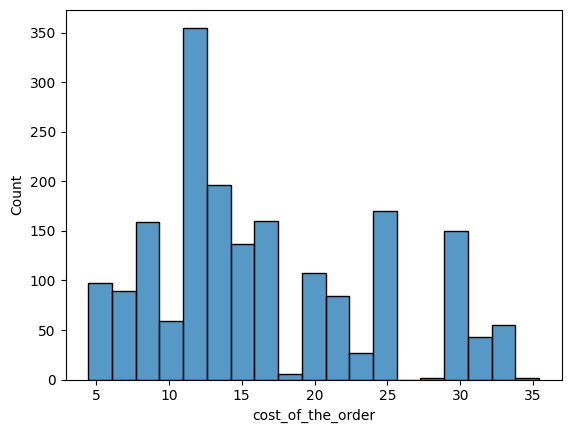

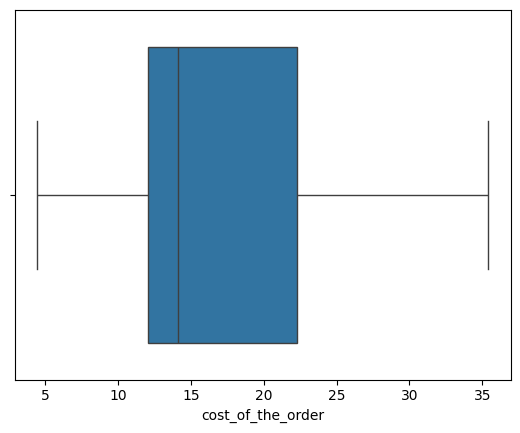

In [21]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations:
There's a lot of orders between \$10 and \$15 dollars, with an average leaning towards \$15, but a peak closer to \$10.

### Day of the Week

In [22]:
df['day_of_the_week'].nunique()

2

<Axes: xlabel='day_of_the_week', ylabel='count'>

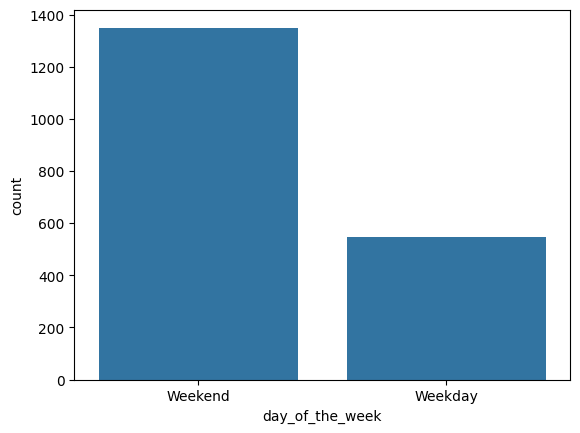

In [23]:
sns.countplot(data = df, x = 'day_of_the_week')

#### Observations:
Most of these orders are during the week, not on the weekend

### Order Rating

In [24]:
df['rating'].nunique()

4

<Axes: xlabel='rating', ylabel='count'>

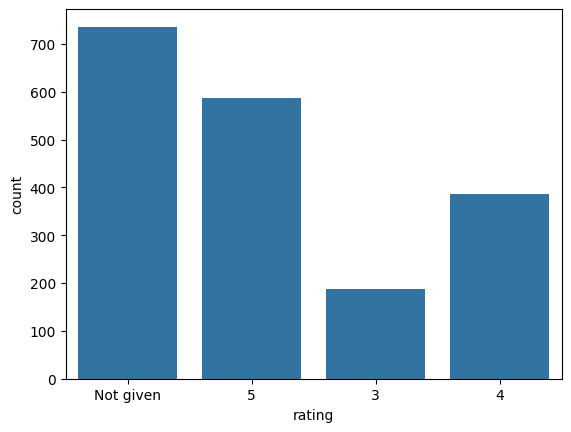

In [25]:
sns.countplot(data = df, x = 'rating')

It seems like most of the ratings are 4+ stars if a rating is given at all, and 'no rating' is the most common result

### Food Prep Time

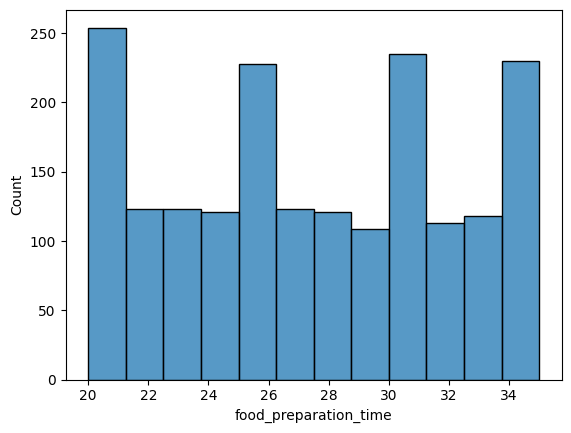

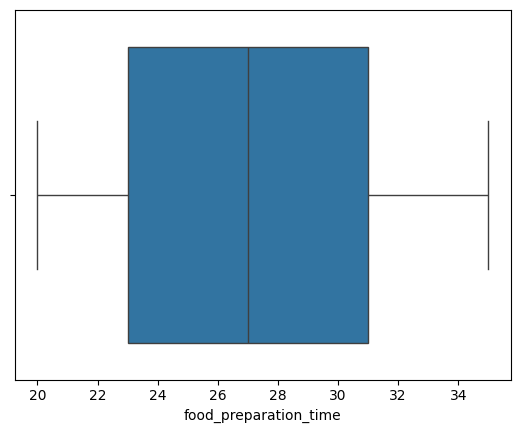

In [27]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:
A very even distribution of prep times.

### Delivery Time

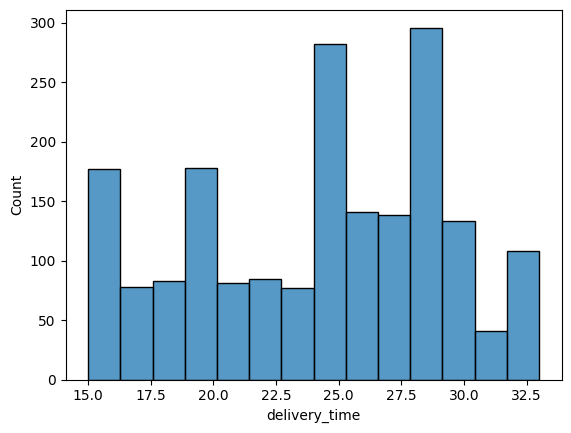

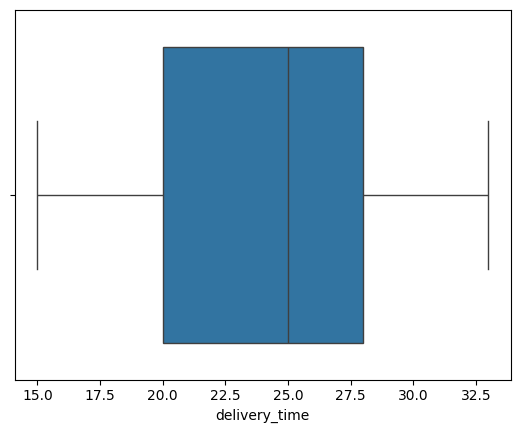

In [28]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:
It looks like the box plot is telling a different story than the histogram.  But most of the orders seem to take *around* 20-25 minutes to deliver.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [31]:
df_order_count = df.groupby('restaurant_name')['order_id'].count().reset_index()
df_order_count.columns = ['restaurant_name', 'order_count']
df_order_count = df_order_count.sort_values(by='order_count', ascending=False)
df_order_count.head()

,restaurant_name,order_count
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


#### Observations:
This list is largely dominated by american restaurants

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [72]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend = df_weekend.groupby('cuisine_type')['order_id'].count().reset_index()
df_weekend = df_weekend.sort_values(by='order_id', ascending=False)
df_weekend.head()

,cuisine_type,order_id
0,American,415
5,Japanese,335
4,Italian,207
1,Chinese,163
8,Mexican,53


#### Observations:
The most popular cuisine on weekends is american

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [40]:
df_greater_than_20 = df[df['cost_of_the_order']>20]
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
~30% of orders are more than \$20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [41]:
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
Average order is delivered in ~24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [42]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
...

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


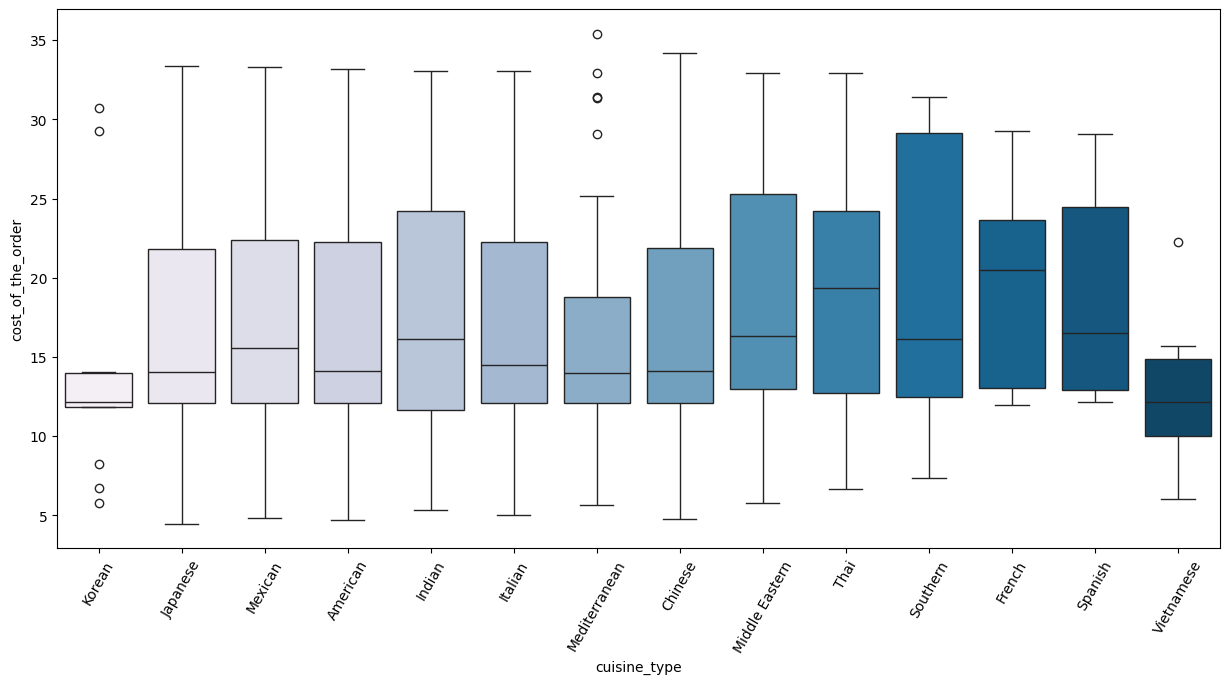

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

####Observations:
Japanese food takes the longest to prepare (it's close!).  Korean and Vietnamese food takes the least time to prepare.

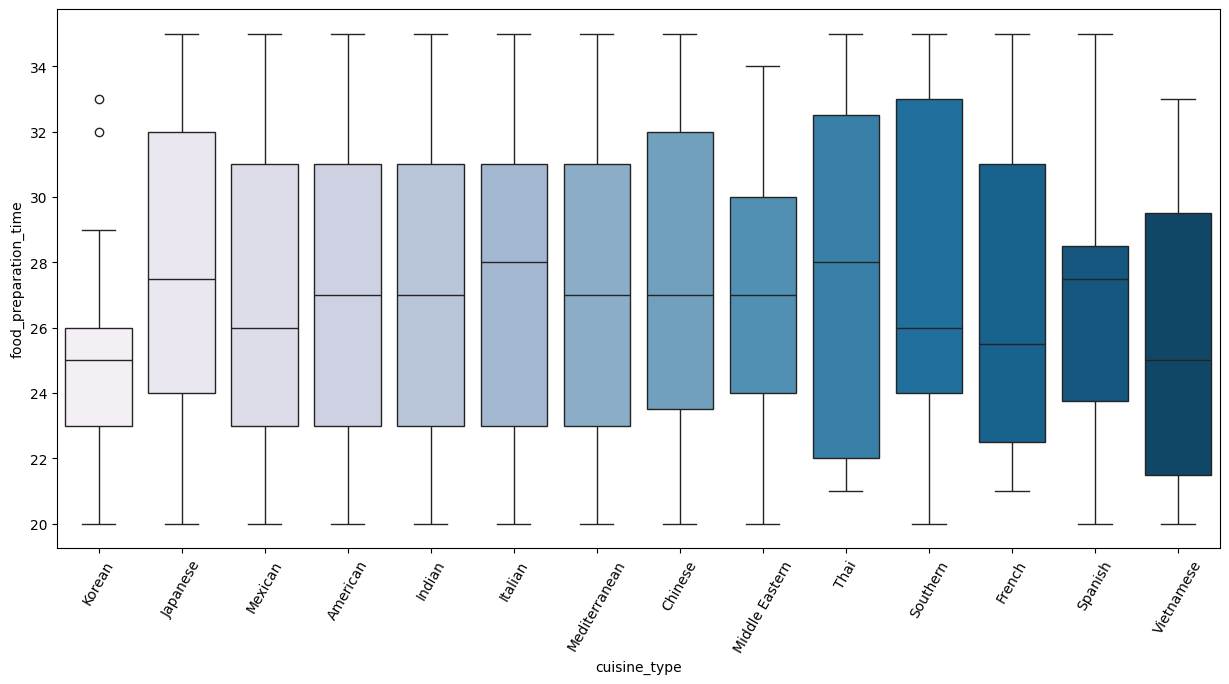

In [45]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Observations:
Korean and Vietnamese cuisine are the cheapest.  French and Thai cuisine average to the most expensive.

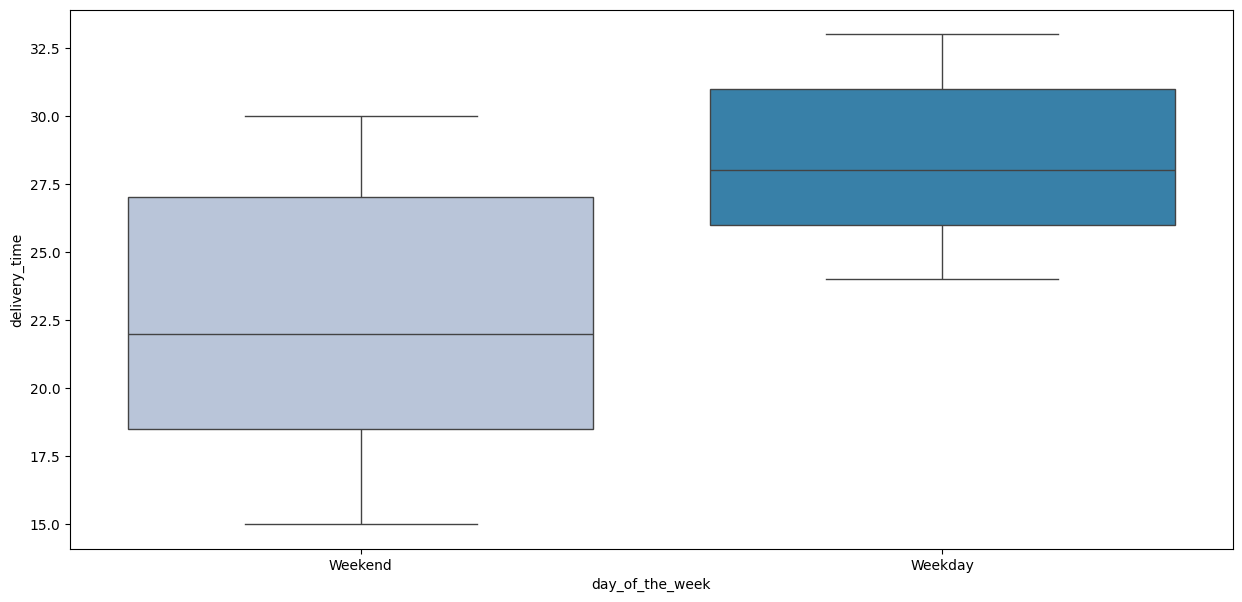

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")
plt.show()

#### Observations:
Delivery times are shorter during the weekend
- Possible connection to earlier observation that more orders were made on the weekend?

In [47]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


#### Observations:
...

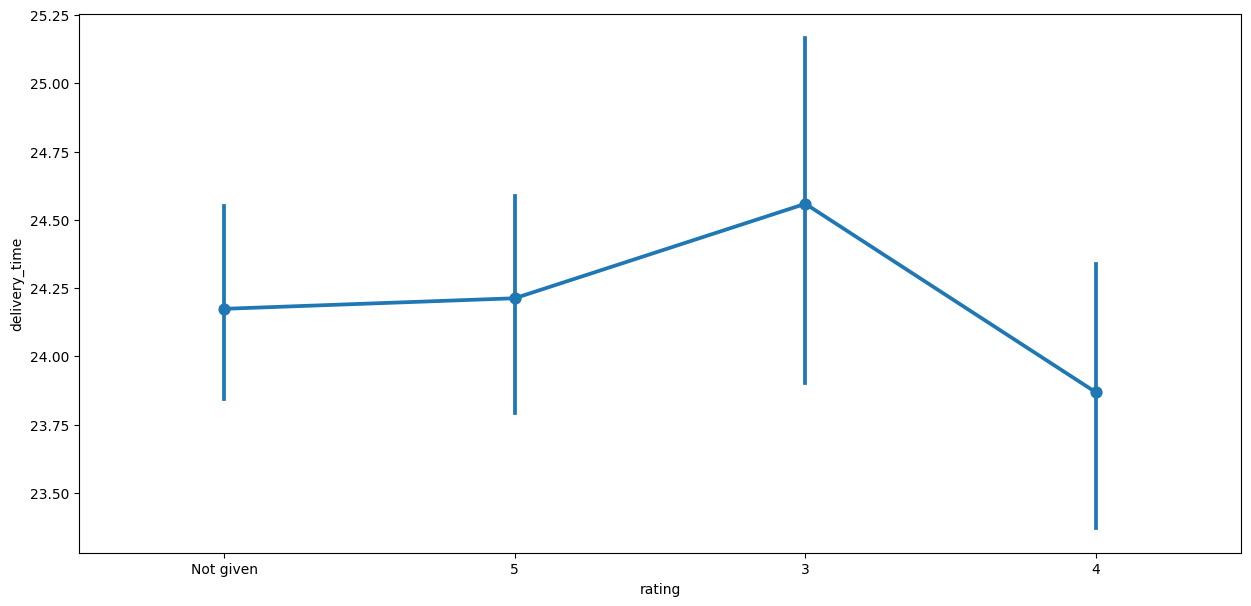

In [48]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observation:
Longer delivery times seem to lead to lower ratings, but...shorter delivery times leads to more middling ratings?

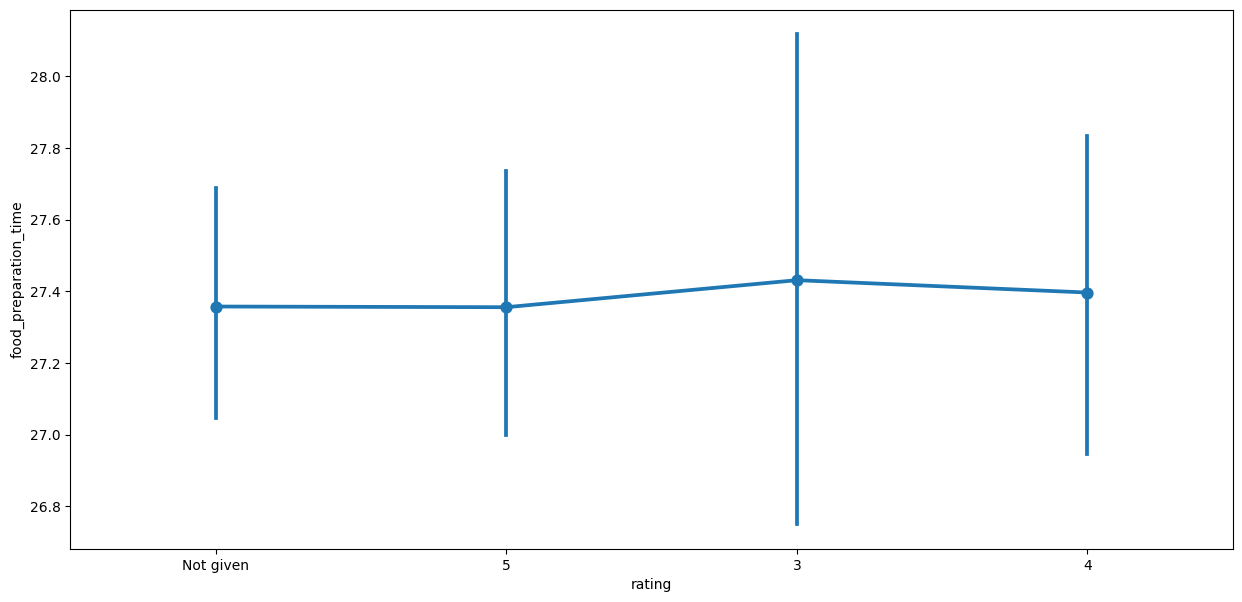

In [49]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations:
Not too much relationship between prep time and rating.

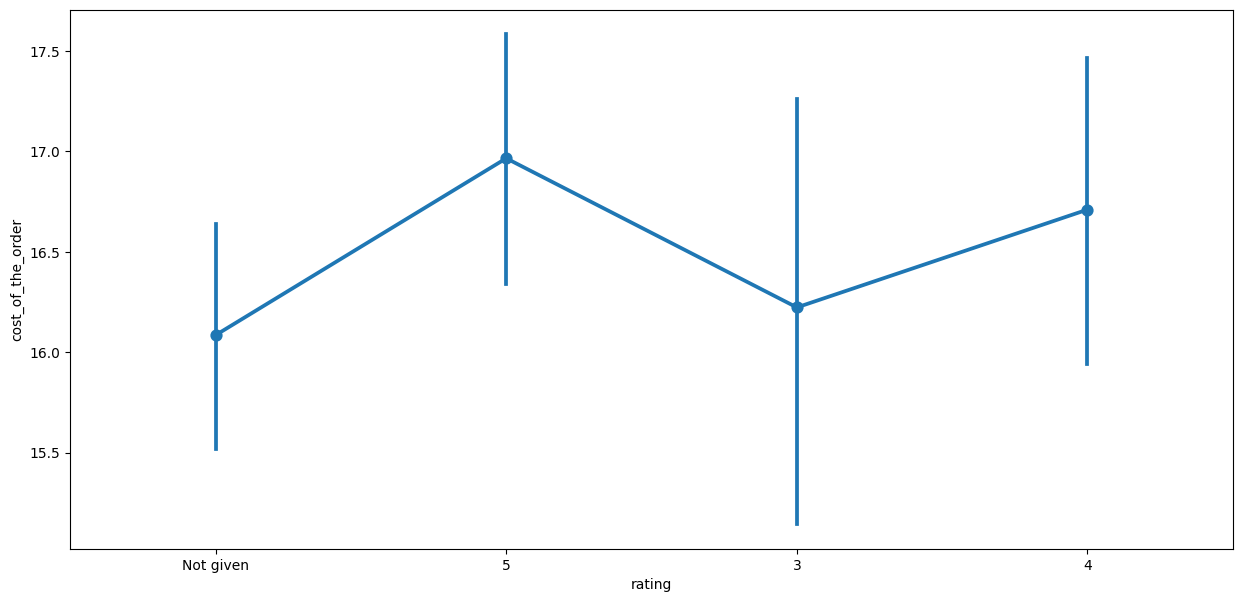

In [50]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Observations:
More expensive orders were rated higher. 🤔

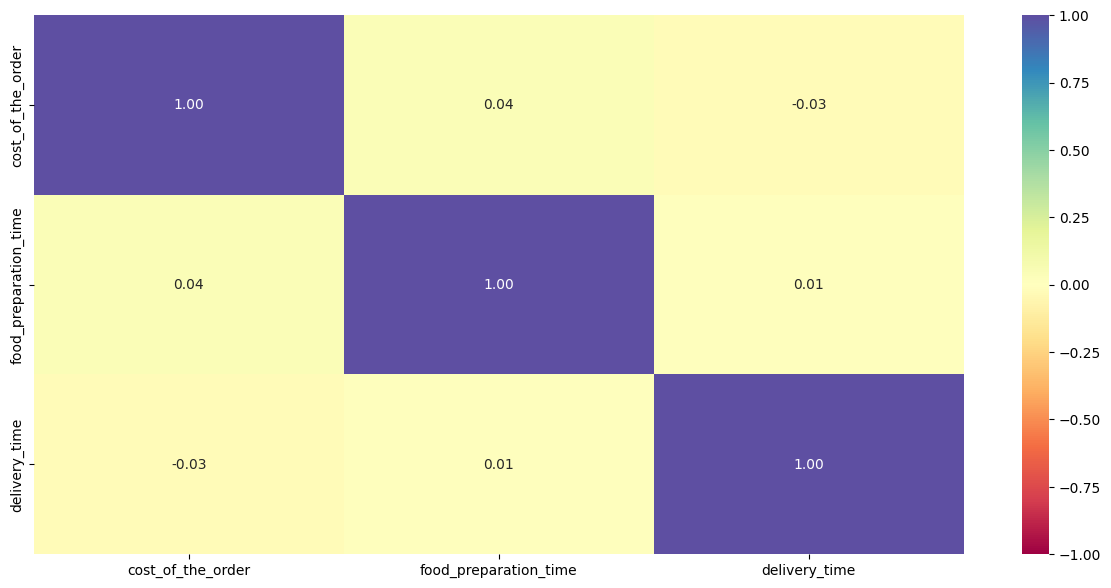

In [51]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
...

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [52]:
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int')
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [53]:
rest_names = df_rating_count[(df_rating_count['rating']>50)]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4
df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
Top rated place is italian, the rest of the top 3 are all american chains

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [55]:
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [56]:
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
The net revenue is around 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [57]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_greater_than_60 = df[df['total_time']>60]
print('The number of total orders that took more than 60 minutes is:', df_greater_than_60.shape[0])
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of orders that took more than 60 minutes:", round(percentage, 2), '%')

The number of total orders that took more than 60 minutes is: 200
Percentage of orders that took more than 60 minutes: 10.54 %


#### Observations:
Starting from when the restaurant confirms, just over 10% of orders take more than 1 hour to reach the customer.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [59]:
print('The mean delivery time on weekdays is around', round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()), 'minutes')
print('The mean delivery time on weekends is around', round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()), 'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:
Delivery takes 6 minutes longer on average during the week

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* More people on average are ordering during the weekend (correlates with shorter delivery times, unsure of causation)
* American cuisine is most popular on the weekends, followed by Japanese, and then Italian.

### Untested Theory:
Weekends are when college sports games happen.

### Recommendations:
* Highlight american restaurants for game night
* Offer a small discount during the week? (say, 5%)

---

In [73]:
!jupyter nbconvert --to html Learner_Notebook_Full_Code.ipynb

[NbConvertApp] Converting notebook Learner_Notebook_Full_Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 894735 bytes to Learner_Notebook_Full_Code.html
